# Exploratory Analysis and Feature Engineering

### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("skillshare_2022_starts_views_combined.csv")
data.drop(labels= ['Unnamed: 0'], axis = 1, inplace=True)

In [3]:
# loading in video views (one file at a time)
vviews = pd.read_csv("skillshare_2022_vviews/skillshare_2022_vviews_0.csv")
vviews.drop(labels= ['Unnamed: 0'], axis = 1, inplace=True)
for i in range(1,63):
    temp_vviews = pd.read_csv("skillshare_2022_vviews/skillshare_2022_vviews_{}.csv".format(i))
    temp_vviews.drop(labels= ['Unnamed: 0'], axis = 1, inplace=True)
    vviews = pd.concat([vviews, temp_vviews])
print("Total rows: {}".format(vviews.size))

Total rows: 146657168


In [4]:
# loading in website visits (one file at a time)
visits = pd.read_csv("skillshare_2022_visits/skillshare_2022_visits_0.csv", error_bad_lines=False)
visits.drop(labels= ['Unnamed: 0'], axis = 1, inplace=True)
for i in range(1,23):
    temp_visits = pd.read_csv("skillshare_2022_visits/skillshare_2022_visits_{}.csv".format(i), error_bad_lines=False)
    temp_visits.drop(labels= ['Unnamed: 0'], axis = 1, inplace=True)
    visits = pd.concat([visits, temp_visits])
print("Total rows: {}".format(visits.size))

C:\Users\gwams\AppData\Local\Temp\ipykernel_9380\2915586678.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  visits = pd.read_csv("skillshare_2022_visits/skillshare_2022_visits_0.csv", error_bad_lines=False)
b'Skipping line 267551: expected 13 fields, saw 18\n'
b'Skipping line 400714: expected 13 fields, saw 16\n'
C:\Users\gwams\AppData\Local\Temp\ipykernel_9380\2915586678.py:2: DtypeWarning: Columns (0,1,4,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  visits = pd.read_csv("skillshare_2022_visits/skillshare_2022_visits_0.csv", error_bad_lines=False)
C:\Users\gwams\AppData\Local\Temp\ipykernel_9380\2915586678.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  temp_visits = pd.read_csv("skillshare_2022_visits/skillshare_2022_visits_{}.csv".format(i), err

C:\Users\gwams\AppData\Local\Temp\ipykernel_9380\2915586678.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  temp_visits = pd.read_csv("skillshare_2022_visits/skillshare_2022_visits_{}.csv".format(i), error_bad_lines=False)
b'Skipping line 268202: expected 13 fields, saw 19\n'
b'Skipping line 669088: expected 13 fields, saw 18\n'
C:\Users\gwams\AppData\Local\Temp\ipykernel_9380\2915586678.py:5: DtypeWarning: Columns (1,4,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_visits = pd.read_csv("skillshare_2022_visits/skillshare_2022_visits_{}.csv".format(i), error_bad_lines=False)
C:\Users\gwams\AppData\Local\Temp\ipykernel_9380\2915586678.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  temp_visits = pd.read_csv("skillshare_2022_visits/skillshare_2022

Total rows: 155412720


In [5]:
combined_data = pd.read_csv("skillshare_combined.csv")

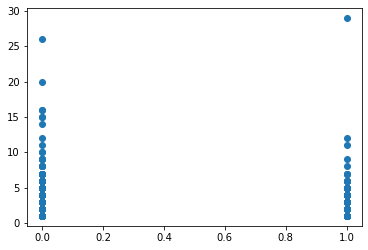

In [6]:
# distribution of success based on comment volume
plt.scatter(combined_data['success'], combined_data['comment_volume'])

In [7]:
# overall churn rate
combined_data['success'].sum()/len(combined_data)

0.23918493715401054

In [8]:
# Load in class data
classes = pd.read_csv("skillshare_2022_classes.csv", index_col = 0)

C:\Users\gwams\AppData\Local\Temp\ipykernel_9380\3956987217.py:2: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  classes = pd.read_csv("skillshare_2022_classes.csv", index_col = 0)


In [9]:
classes.columns

Index(['class_id', 'class_title', 'create_time', 'description', 'takeaway',
       'category', 'subcategory', 'status', 'is_featured', 'is_premium_only',
       'publish_time', 'publish_date', 'teacher_uid', 'teacher_name',
       'is_top_teacher', 'teacher_create_time', 'teacher_account_age',
       'is_original', 'class_type', 'quality_grade', 'quality_grade_letter',
       'is_quality_class', 'grade_note', 'n_reviews', 'review_avg', 'level_id',
       'level', 'has_been_staff_pick', 'n_times_staff_pick',
       'first_staff_pick_time', 'last_staff_pick_time', 'has_project',
       'project_title', 'sku', 'class_detail_page_link',
       'total_video_duration', 'n_lessons', 'trailer_duration',
       'first_lesson_duration', 'class_display_name', 'image_huge', 'language',
       'language_grade_notes_1', 'language_grade_notes_2',
       'language_grade_notes_3', 'language_grade_notes_all',
       'has_non_english_content', 'non_english_language_1', 'class_origin',
       'class_origi

#### Analysis of Class Views

Look at number of classes done


avg percent of lessons completed in class


Avg rating of classes "taken"


In [10]:
pd.set_option('display.max_columns', None)

In [11]:
vviews['percent_duration_watched'] = vviews['sum'] / vviews['video_duration']
vviews.sort_values(by = 'percent_duration_watched', ascending = False)

,uid,class_id,lesson_id,lesson_number,is_trailer,video_duration,view_date,sum,percent_duration_watched
245807,8554570,474754,3834939,1,False,33.0,2022-05-10,25391,769.424242
242376,8554570,474754,3834939,1,False,33.0,2022-05-09,25357,768.393939
188639,22527652,265586,2918719,1,False,45.0,2022-02-21,22065,490.333333
71379,23830467,364462,3284070,2,False,57.0,2022-01-17,27029,474.192982
124420,25185655,377800,3943275,0,True,89.0,2022-03-25,34275,385.112360
...,...,...,...,...,...,...,...,...,...
176103,26260228,108140,652800,0,True,NaN,2022-05-30,31,NaN
179361,25550184,108140,652800,0,True,NaN,2022-06-01,32,NaN
182822,26224023,353208,3793082,20,False,NaN,2022-06-01,183,NaN
228318,26221707,108140,652800,0,True,NaN,2022-05-28,31,NaN


In [12]:
lessons_per_class = vviews.groupby(['uid', 'class_id']).nunique()
# lessons_per_class.drop(labels = ['uid', 'class_id'], axis = 1, inplace=True)
lessons_per_class.reset_index(inplace=True)
lessons_per_class = lessons_per_class.merge(classes[['class_id', 'n_lessons']], left_on = 'class_id', right_on = 'class_id', how = 'left')
lessons_per_class = lessons_per_class[['uid', 'class_id', 'lesson_id', 'n_lessons']]
lessons_per_class['percent_lessons_watched'] = lessons_per_class['lesson_id']/lessons_per_class['n_lessons']
avg_lessons_watched = lessons_per_class.groupby('uid').mean().reset_index()[['uid', 'percent_lessons_watched']]

In [13]:
combined_data = combined_data.merge(avg_lessons_watched, left_on = 'user_uid', right_on = 'uid', how = 'left')
combined_data.drop(labels = ['uid'], axis = 1, inplace=True)
combined_data.head()

,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,trial_end_day,is_cancel_during_trial,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg,percent_lessons_watched
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,2022-02-01,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500
1,23674285,2022-01-01 00:00:27,0,0.0,-1,-1,0,2,116,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,0.0,1,5,0,10,30,2022-01-01,2022-02-01,0,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169298
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,2022-02-01,0,1211.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231692
4,23692349,2022-01-01 00:02:04,1,0.0,2,2,0,16,55,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([3417482., 1051690.,  725397.,  585870.,  563460.,  772040.,
         802162.,  574538.,  914339., 1165279.]),
 array([0.        , 0.09998575, 0.1999715 , 0.29995725, 0.399943  ,
        0.49992875, 0.59991451, 0.69990026, 0.79988601, 0.89987176,
        0.99985751]),
 <BarContainer object of 10 artists>)

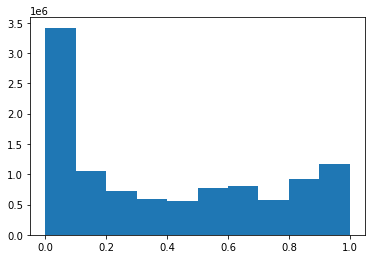

In [14]:
plt.hist(vviews[vviews['percent_duration_watched'] < 1]['percent_duration_watched'])

In [15]:
num_classes = vviews.groupby('uid').nunique()
num_classes.reset_index(inplace=True)

In [16]:
combined_data = combined_data.merge(num_classes[['uid', 'class_id']], left_on = 'user_uid', right_on = 'uid', how = 'left')
combined_data.rename({'class_id': 'num_classes_watched'}, inplace=True, axis = 1)
combined_data.drop(labels = ['uid'], axis =1,inplace=True)

(array([213492.,  43036.,  15038.,   7486.,   4046.,   2630.,   1751.,
          1121.,    745.,    514.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <BarContainer object of 10 artists>)

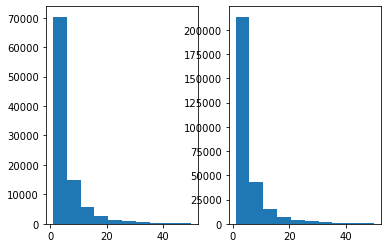

In [17]:
num_watched = combined_data[combined_data['num_classes_watched'] <= 50]
plt.subplot(1,2,1)
plt.hist(num_watched[num_watched['success'] == 1]['num_classes_watched'])
plt.subplot(1,2,2)
plt.hist(num_watched[num_watched['success'] == 0]['num_classes_watched'])

In [18]:
classes_grouped_by_success = combined_data.groupby("success")\
    .mean()['num_classes_watched']

classes_grouped_by_success.head()

success
0    5.691361
1    5.587129
Name: num_classes_watched, dtype: float64

In [19]:
minutes_grouped_by_success = combined_data.groupby("success")\
    .median()['percent_lessons_watched']
minutes_grouped_by_success.head()

success
0    0.285453
1    0.298231
Name: percent_lessons_watched, dtype: float64

In [20]:
import datetime as dt
combined_data['create_time'] = pd.to_datetime(combined_data['create_time'], errors = 'coerce')
combined_data['cancellation_time'] = pd.to_datetime(combined_data['cancellation_time'], errors = 'coerce')
combined_data['days_canceled_since_start'] = (combined_data['cancellation_time'] - combined_data['create_time']).dt.days

(array([1.03659e+05, 1.52253e+05, 2.80530e+04, 6.66080e+04, 1.55700e+03,
        5.29000e+02, 3.33000e+02, 2.19000e+02, 1.54000e+02, 7.00000e+01]),
 array([  0. ,  16.9,  33.8,  50.7,  67.6,  84.5, 101.4, 118.3, 135.2,
        152.1, 169. ]),
 <BarContainer object of 10 artists>)

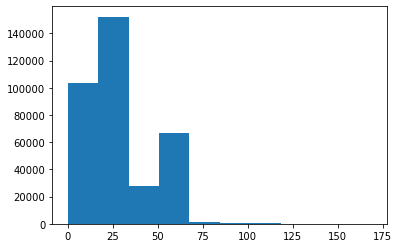

In [21]:
plt.hist(combined_data['days_canceled_since_start'])

In [22]:
# being really heavy into one specific course could point to only wanting the free trial for a specific course
# 7-day trial is given when someone goes to skillshare and signs up organically (40%) - these people searched for skillshare
# 30-day trial is given to those who navigate through paid marketing (25%) - these people "stumbled" upon skillshare

In [23]:
combined_data.head()
# see if user took a featured class had effect on subscription
# success by category of classes
# success rate by teacher
# average user quality_grade taken for class

,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,trial_end_day,is_cancel_during_trial,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg,percent_lessons_watched,num_classes_watched,days_canceled_since_start
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,2022-02-01,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500,1.0,30.0
1,23674285,2022-01-01 00:00:27,0,NaT,-1,-1,0,2,116,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,NaT,1,5,0,10,30,2022-01-01,2022-02-01,0,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169298,3.0,NaN
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,2022-02-01,0,1211.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231692,6.0,53.0
4,23692349,2022-01-01 00:02:04,1,NaT,2,2,0,16,55,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
class_uid = vviews[['uid', 'class_id']].drop_duplicates().reset_index(drop=True)

In [25]:
combined_views_class = class_uid.merge(classes, left_on = 'class_id', right_on = 'class_id', how = 'left')

In [26]:
user_avg_classes = combined_views_class.groupby('uid').mean()[['review_avg', 'quality_grade', 'level_id']].reset_index() # avg "value" of courses taken by user


In [27]:
combined_data = combined_data.merge(user_avg_classes, left_on = 'user_uid', right_on = 'uid', how = 'left')

In [28]:
combined_data.rename({'review_avg':'classes_review_avg', 'quality_grade':'class_quality_grade_avg', 'level_id':'avg_class_difficulty'}, axis = 1, inplace=True)
combined_data.drop('uid', axis =1, inplace=True)

In [29]:
combined_views_class['is_top_teacher'] = combined_views_class['is_top_teacher'].astype(bool)
user_sum_tt = combined_views_class.groupby('uid').sum()['is_top_teacher'].reset_index()

In [30]:
user_sum_tt['watched_top_teacher'] = np.where(user_sum_tt['is_top_teacher'] == 0, 0, 1)

In [31]:
combined_data = combined_data.merge(user_sum_tt[['uid', 'watched_top_teacher']], left_on = 'user_uid', right_on = 'uid', how = 'left')
combined_data.drop(labels = ['uid'], inplace=True, axis =1)

## Class Category Analysis

In [32]:
import numpy as np
combined_views_class['D'] = 1
uid_class_category = pd.pivot_table(combined_views_class[['uid', 'category', 'D']], \
                                    columns = 'category', index = 'uid', values = 'D')
uid_class_category_counts = pd.pivot_table(combined_views_class[['uid', 'category', 'D']], \
                                    columns = 'category', index = 'uid', values = 'D', aggfunc = np.sum)

In [33]:
uid_class_category_counts['preferred_category'] = uid_class_category_counts[['Business', 'Creative', 'Lifestyle', 'Technology']]\
    .idxmax(axis=1)

In [34]:
uid_preferred_category = uid_class_category_counts['preferred_category'].reset_index()

In [35]:
combined_data = combined_data.merge(uid_preferred_category, left_on = 'user_uid', right_on = 'uid', how = 'left')

In [36]:
creative = combined_data[combined_data['preferred_category'] == 'Creative']
business = combined_data[combined_data['preferred_category'] == 'Business']
lifestyle = combined_data[combined_data['preferred_category'] == 'Lifestyle']
technology = combined_data[combined_data['preferred_category'] == 'Technology']


In [37]:
print(creative['success'].sum()/len(creative))
print(business['success'].sum()/len(business))
print(lifestyle['success'].sum()/len(lifestyle))
print(technology['success'].sum()/len(technology))

0.2695285770879101
0.2309780659966602
0.22725978647686831
0.21703242968352698


In [38]:
uid_class_subcategory_counts = pd.pivot_table(combined_views_class[['uid', 'subcategory', 'D']], \
                                    columns = 'subcategory', index = 'uid', values = 'D', aggfunc = np.sum)
uid_class_subcategory_counts['preferred_subcategory'] = uid_class_subcategory_counts.idxmax(axis=1)
uid_preferred_subcategory = uid_class_subcategory_counts['preferred_subcategory'].reset_index()

In [39]:
combined_data = combined_data.merge(uid_preferred_subcategory, left_on = 'user_uid', right_on = 'uid', how = 'left')

In [40]:
subcategories = []
p1_percs = []
counts = []
for subcategory in combined_data['preferred_subcategory'].unique():
    subset = combined_data[combined_data['preferred_subcategory'] == subcategory]
    subcategories.append(subcategory)
    p1_percs.append(subset['success'].sum()/len(subset))
    counts.append(len(subset))
    # print("Subcategory: {}  P1 Percentage: {}".format(subcategory, subset['success'].sum()/len(subset)))
subcategory_p1_df = pd.DataFrame({'subcategory':subcategories, 'p1_rate':p1_percs, 'users':counts}).sort_values(by = 'p1_rate', ascending=False)

C:\Users\gwams\AppData\Local\Temp\ipykernel_9380\1899183423.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  p1_percs.append(subset['success'].sum()/len(subset))


In [41]:
combined_data.drop(labels = ['uid_x', 'uid_y'], axis =1, inplace=True)
combined_data.head()

,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,trial_end_day,is_cancel_during_trial,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg,percent_lessons_watched,num_classes_watched,days_canceled_since_start,classes_review_avg,class_quality_grade_avg,avg_class_difficulty,watched_top_teacher,preferred_category,preferred_subcategory
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,2022-02-01,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500,1.0,30.0,3.200000,95.000000,2.000000,0.0,Creative,Animation
1,23674285,2022-01-01 00:00:27,0,NaT,-1,-1,0,2,116,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,NaT,1,5,0,10,30,2022-01-01,2022-02-01,0,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169298,3.0,NaN,3.333333,88.333333,1.333333,0.0,Creative,Illustration
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,2022-02-01,0,1211.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231692,6.0,53.0,3.533333,89.166667,2.666667,1.0,Creative,Illustration
4,23692349,2022-01-01 00:02:04,1,NaT,2,2,0,16,55,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
class_uid_video = vviews[['uid', 'class_id', 'is_trailer', 'view_date']].drop_duplicates().reset_index(drop=True)
user_video_views = class_uid_video.merge(classes, left_on = 'class_id', right_on = 'class_id', how = 'left')
user_video_views['row_number'] = user_video_views.sort_values(by = ['view_date', 'class_id', 'is_trailer'], \
                            ascending=[True, True, False]).groupby(['uid']).cumcount() + 1
first_class = user_video_views[user_video_views['row_number'] == 1][['uid', 'class_id', 'quality_grade', \
                                                    'review_avg', 'level_id', 'n_lessons', 'trailer_duration']]
first_class.rename({'class_id':'first_class_taken', \
                    'quality_grade':'first_class_quality_grade',\
                    'review_avg':'first_class_review_avg',\
                    'level_id': 'first_class_difficulty', \
                    'n_lessons':'first_class_n_lessons',\
                    'trailer_duration':'first_class_trailer_duration'}, axis = 1, inplace=True)
combined_data = combined_data.merge(first_class, left_on = 'user_uid', right_on = 'uid', how = 'left')
combined_data.drop(labels = ['uid', 'class_id'], axis = 1, inplace = True)

In [49]:
combined_data.head()

,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,trial_end_day,is_cancel_during_trial,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg,percent_lessons_watched,num_classes_watched,days_canceled_since_start,classes_review_avg,class_quality_grade_avg,avg_class_difficulty,watched_top_teacher,preferred_category,preferred_subcategory,quality_grade,review_avg,level_id,n_lessons,trailer_duration,first_class_taken,first_class_quality_grade,first_class_review_avg,first_class_difficulty,first_class_n_lessons,first_class_trailer_duration
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,2022-02-01,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500,1.0,30.0,3.200000,95.000000,2.000000,0.0,Creative,Animation,95.0,3.2,2.0,16.0,1.50,390935.0,95.0,3.2,2.0,16.0,1.50
1,23674285,2022-01-01 00:00:27,0,NaT,-1,-1,0,2,116,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,NaT,1,5,0,10,30,2022-01-01,2022-02-01,0,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169298,3.0,NaN,3.333333,88.333333,1.333333,0.0,Creative,Illustration,95.0,3.1,2.0,12.0,1.05,240685.0,95.0,3.1,2.0,12.0,1.05
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,2022-02-01,0,1211.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231692,6.0,53.0,3.533333,89.166667,2.666667,1.0,Creative,Illustration,95.0,3.1,2.0,12.0,1.05,240685.0,95.0,3.1,2.0,12.0,1.05
4,23692349,2022-01-01 00:02:04,1,NaT,2,2,0,16,55,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
